In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [18]:
dataset = load_digits()
X = dataset.data
Y = dataset.target
Y = np.eye(10)[Y]       # one hot

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [19]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def root_mean_square_error(Y_gt, Y_pred):
    return np.sqrt(np.mean((Y_gt - Y_pred) ** 2))

In [20]:
epochs = 80
η = 0.001        # learning rate

D_in = X_train.shape[1]               # Input layer number of neurons = 60
H1 = 128                              # Hidden layer 1 number of neurons
H2 = 32                               # Hidden layer 2 number of neurons
D_out = Y_train.shape[1]              # Output layer number of neurons = 10

In [21]:
W1 = np.random.randn(D_in, H1)
W2 = np.random.randn(H1, H2)
W3 = np.random.randn(H2, D_out)

In [22]:
B1 = np.random.randn(1, H1)
B2 = np.random.randn(1, H2)
B3 = np.random.randn(1, D_out)

In [24]:
Loss_Train = []         
Acc_Train = []
Loss_Test = []
Acc_Test = []

for epoch in range(epochs):

    # train
    Y_pred_train = []
    for x, y in zip(X_train, Y_train):

        x = x.reshape(-1, 1)

        # forward

        # layer 1
        out1 = sigmoid(x.T @ W1 + B1)

        # layer 2
        out2 = sigmoid(out1 @ W2 + B2)

        # layer 3
        out3 = softmax(out2 @ W3 + B3)
        y_pred = out3
        Y_pred_train.append(y_pred)

        # backpropagation

        # layer 3
        error = -2 * (y - y_pred)               # root_mean_square_error derivative
        grad_B3 = error
        grad_W3 = out2.T @ error

        # layer 2
        error = error @ W3.T * out2 * (1 - out2)
        grad_B2 = error
        grad_W2 = out1.T @ error

        # layer 1
        error = error @ W2.T * out1 * (1 - out1)
        grad_B1 = error
        grad_W1 = x @ error

        # update

        # layer 1
        W1 -= η * grad_W1
        B1 -= η * grad_B1

        # layer 2
        W2 -= η * grad_W2
        B2 -= η * grad_B2

        # layer 3
        W3 -= η * grad_W3
        B3 -= η * grad_B3

    # test
    Y_pred_test = []
    for x, y in zip(X_test, Y_test):

        x = x.reshape(-1, 1)

        # forward

        # layer 1
        out1 = sigmoid(x.T @ W1 + B1)

        # layer 2
        out2 = sigmoid(out1 @ W2 + B2)

        # layer 3
        out3 = softmax(out2 @ W3 + B3)
        y_pred = out3
        Y_pred_test.append(y_pred)

    Y_pred_train = np.array(Y_pred_train).reshape(-1, 10)
    loss_train = root_mean_square_error(Y_train, Y_pred_train)
    accuracy_train = np.sum(np.argmax(Y_train, axis=1)==np.argmax(Y_pred_train, axis=1)) / len(Y_train)
    print("loss train:", loss_train)
    print("accuracy train:", accuracy_train)
    Loss_Train.append(loss_train)                                       
    Acc_Train.append(accuracy_train)  

    Y_pred_test = np.array(Y_pred_test).reshape(-1, 10)
    loss_test = root_mean_square_error(Y_test, Y_pred_test)
    accuracy_test = np.sum(np.argmax(Y_test, axis=1)==np.argmax(Y_pred_test, axis=1)) / len(Y_test)
    print("loss test:", loss_test)
    print("accuracy test:", accuracy_test)                                        
    Loss_Test.append(loss_test)                                         
    Acc_Test.append(accuracy_test)


loss train: 0.3196194494919596
accuracy train: 0.19693806541405706
loss test: 0.30323942727739
accuracy test: 0.23333333333333334
loss train: 0.2775725449237727
accuracy train: 0.38761308281141266
loss test: 0.2733804461371431
accuracy test: 0.3972222222222222
loss train: 0.25489843274026835
accuracy train: 0.5184411969380655
loss test: 0.2582606640420034
accuracy test: 0.5138888888888888
loss train: 0.23680835679577372
accuracy train: 0.605427974947808
loss test: 0.24801605970412796
accuracy test: 0.5555555555555556
loss train: 0.22297431630105471
accuracy train: 0.6569241475295755
loss test: 0.23864101969237297
accuracy test: 0.5861111111111111
loss train: 0.21097284178555017
accuracy train: 0.697286012526096
loss test: 0.22950836737443042
accuracy test: 0.6166666666666667
loss train: 0.20047713293114727
accuracy train: 0.7334725121781489
loss test: 0.22152389220684474
accuracy test: 0.6611111111111111
loss train: 0.19169718662803262
accuracy train: 0.7585247042449548
loss test: 0.21

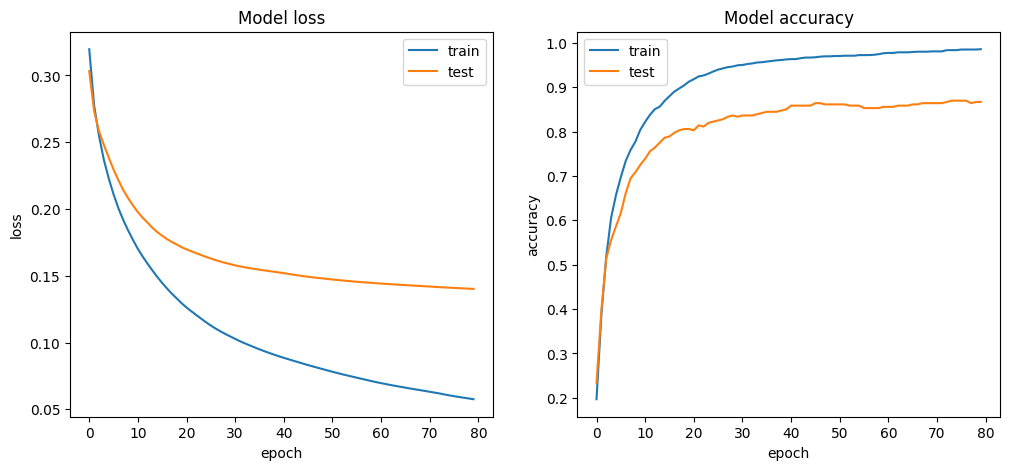

In [27]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize=(12,5))


ax1.plot(Loss_Train)
ax1.plot(Loss_Test)
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend(["train" , "test"])
ax1.title.set_text(f'Model loss')

ax2.plot(Acc_Train)
ax2.plot(Acc_Test)
ax2.set_xlabel("epoch")
ax2.set_ylabel("accuracy")
ax2.legend(["train" , "test"])
ax2.title.set_text('Model accuracy')

plt.show()

In [26]:
import cv2

image = cv2.imread("input/test4.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = image.reshape(64, 1)

x = image
# forward

# layer 1
out1 = sigmoid(x.T @ W1 + B1)

# layer 2
out2 = sigmoid(out1 @ W2 + B2)

# layer 3
out3 = softmax(out2 @ W3 + B3)
y_pred = out3
print(y_pred)
print(np.argmax(y_pred))

[[1.04915295e-06 9.72018774e-01 5.87911010e-03 5.58205854e-04
  3.67947388e-03 1.70644462e-05 3.10674211e-03 5.85715116e-04
  1.41147857e-02 3.90798975e-05]]
1
